In [1]:
import gym

## BASIC

#### get environment

In [2]:
env = gym.make('CartPole-v0')

#### start an episode 

In [3]:
# 1. put yourself in the start position
env.reset()

array([ 0.04438647,  0.01521852, -0.03397071,  0.02352704])

In [4]:
# return is an array: 4 float number 
## [cart position, cart velocity, pole angle, pole velocity]

In [5]:
box = env.observation_space

In [8]:
box

Box(4,)

#### Action sapce

In [9]:
# action: discrete, 0: pull to left, 1: pull to right
env.action_space

Discrete(2)

#### Play an episode, do one step

In [11]:
# observation, reward, done, info = env.step(action)
## info is meaningless, not allowed to used in your submission

#### finish an episode

In [13]:
# Benchmark
## done = False
## while not done:
#3      observation, reward, done, _ = env.step(env.action_space.sample())

## EX: RANDOM SEARCH

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

In [16]:
def play_one_episode(env, params):
    observation = env.reset() # start info
    done = False
    t = 0

    while not done and t < 10000:
        # env.render()
        t += 1
        action = get_action(observation, params) # first, based on the env, get an action
        observation, reward, done, info = env.step(action) # second , use action to renew state
        if done:
            break

    return t

In [17]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)

    for i in range(T):
        episode_lengths[i] = play_one_episode(env, params)

    avg_length = episode_lengths.mean()
    print("avg length:", avg_length)
    return avg_length

In [18]:
def random_search(env):
    episode_lengths = []
    best = 0
    params = None
    for t in range(100):
        new_params = np.random.random(4)*2 - 1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_lengths.append(avg_length)

        if avg_length > best:
            params = new_params
            best = avg_length
    return episode_lengths, params

avg length: 52.94
avg length: 11.29
avg length: 54.09
avg length: 8.95
avg length: 40.64
avg length: 96.36
avg length: 141.09
avg length: 80.71
avg length: 102.32
avg length: 8.96
avg length: 9.12
avg length: 8.88
avg length: 72.92
avg length: 9.63
avg length: 197.56
avg length: 9.01
avg length: 21.62
avg length: 9.63
avg length: 9.67
avg length: 25.3
avg length: 9.6
avg length: 43.83
avg length: 9.31
avg length: 9.36
avg length: 97.47
avg length: 45.34
avg length: 8.97
avg length: 85.95
avg length: 9.1
avg length: 12.57
avg length: 9.72
avg length: 70.63
avg length: 9.69
avg length: 138.72
avg length: 76.24
avg length: 8.7
avg length: 60.74
avg length: 9.43
avg length: 9.34
avg length: 9.77
avg length: 18.45
avg length: 9.1
avg length: 8.87
avg length: 80.85
avg length: 9.01
avg length: 9.73
avg length: 9.45
avg length: 9.06
avg length: 11.46
avg length: 9.61
avg length: 23.81
avg length: 191.5
avg length: 200.0
avg length: 30.04
avg length: 22.57
avg length: 22.33
avg length: 28.9
av

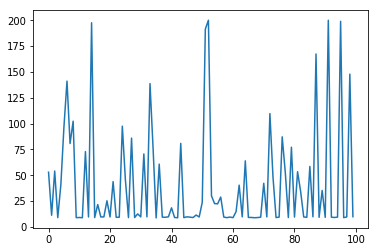

***Final run with final weights***
avg length: 200.0


In [19]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()

    # play a final set of episodes
    print("***Final run with final weights***")
    play_multiple_episodes(env, 100, params)

## SAVE A VIDEO

In [20]:
from gym import wrappers

avg length: 9.39
avg length: 9.04
avg length: 9.51
avg length: 9.28
avg length: 187.33
avg length: 9.22
avg length: 61.19
avg length: 8.89
avg length: 9.41
avg length: 9.38
avg length: 9.59
avg length: 9.71
avg length: 9.33
avg length: 9.44
avg length: 9.44
avg length: 57.18
avg length: 200.0
avg length: 58.02
avg length: 8.95
avg length: 39.2
avg length: 200.0
avg length: 186.4
avg length: 9.02
avg length: 79.2
avg length: 9.78
avg length: 9.66
avg length: 9.53
avg length: 9.84
avg length: 48.21
avg length: 128.99
avg length: 9.09
avg length: 8.73
avg length: 9.72
avg length: 9.34
avg length: 10.89
avg length: 8.84
avg length: 9.48
avg length: 40.01
avg length: 45.18
avg length: 9.15
avg length: 129.49
avg length: 11.38
avg length: 28.59
avg length: 9.35
avg length: 9.51
avg length: 9.4
avg length: 200.0
avg length: 8.85
avg length: 20.53
avg length: 79.04
avg length: 63.94
avg length: 9.57
avg length: 9.28
avg length: 9.69
avg length: 9.56
avg length: 119.17
avg length: 9.45
avg leng

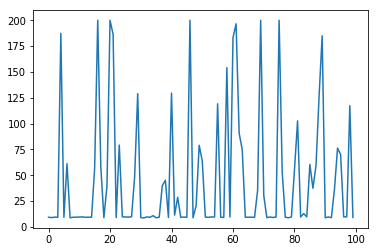

***Final run with final weights***: 200


In [27]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()

    # play a final set of episodes
    env = wrappers.Monitor(env, 'first_video')
    print("***Final run with final weights***:", play_one_episode(env, params))